# Importing required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # About Dataset
 The data contains road accident information for 50 cities of India in the year
 2020.

 source : https://data.gov.in/catalog/road-accidents-india-2020

In [ ]:
data=pd.read_csv('/content/Regulatory Affairs of Road Accident Data 2020 India.csv')
data.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [ ]:
df=data.copy()

# EDA:

In [ ]:
# Getting Info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
# Checking for null values:
df.isnull().sum()

,0
Million Plus Cities,0
Cause category,0
Cause Subcategory,0
Outcome of Incident,0
Count,3


In [ ]:
# Checking for duplicate values:
df.duplicated().sum()

np.int64(0)

In [ ]:
# No type error.
# Null Values Present.
# No duplicate values.

# Data Pre-Processing:

In [ ]:
print("% Of null values:",(df.isnull().sum().sum()/df.shape[0])*100)

% Of null values: 0.031413612565445025


In [ ]:
# Dropping of null values:
df.dropna(inplace=True)

In [ ]:
df.rename(columns={'Million Plus Cities': 'city'}, inplace=True)

# Data Analysis & Visualization:

 A. Distribution of Accidents Across Cities

In [ ]:
df.head(2)

,city,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0


In [ ]:
City_accident=df.groupby('city')['Count'].sum().reset_index()
City_accident

,city,Count
0,Agra,15483.0
1,Ahmedabad,17796.0
2,Allahabad(Prayagraj),18066.0
3,Amritsar,1645.0
4,Asansol Durgapur,7164.0
5,Aurangabad,6475.0
6,Bengaluru,53535.0
7,Bhopal,35069.0
8,Chandigarh,2900.0
9,Chennai,78459.0


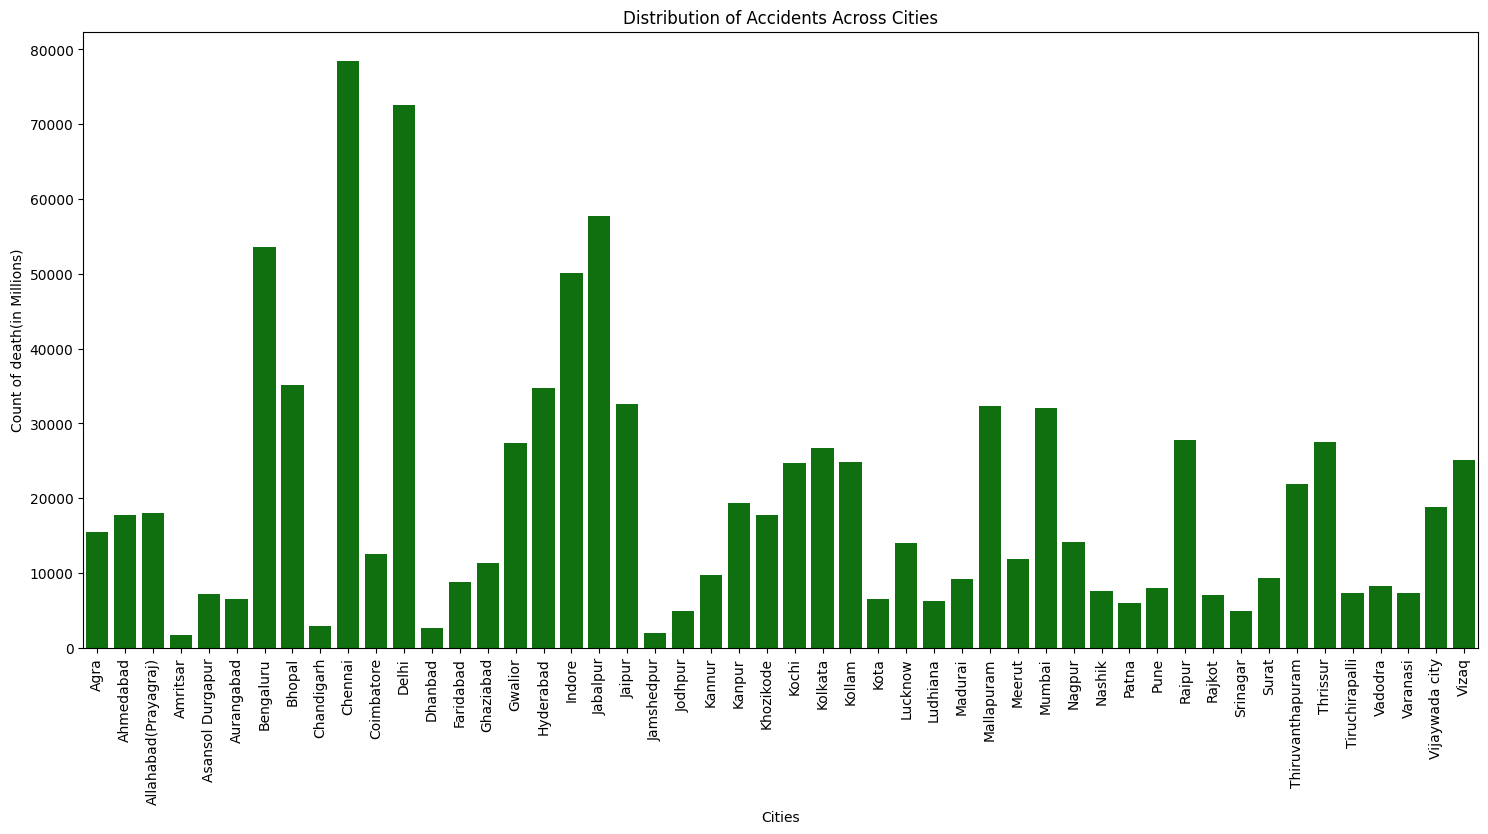

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Distribution of Accidents Across Cities')
sns.barplot(data=City_accident,x='city',y='Count',color='g')
plt.xlabel('Cities')
plt.xticks(rotation=90)
plt.ylabel('Count of death(in Millions)')
plt.show()

In [ ]:
# Top 5 cities in order to high number of accidents
df.groupby('city')['Count'].sum().sort_values(ascending=False)[:5]

,Count
city,
Chennai,78459.0
Delhi,72526.0
Jabalpur,57715.0
Bengaluru,53535.0
Indore,50098.0


In [ ]:
# Top 5 cities in order to lesser number of accidents
df.groupby('city')['Count'].sum().sort_values()[:5]

,Count
city,
Amritsar,1645.0
Jamshedpur,1997.0
Dhanbad,2560.0
Chandigarh,2900.0
Jodhpur,4881.0


 B. Analysis of Accident Causes

In [ ]:
df.head(2)

,city,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0


In [ ]:
accident_cause=df.groupby('Cause category')['city'].count().reset_index()
accident_cause

,Cause category,city
0,Impacting Vehicle/Object,1797
1,Junction,1500
2,Road Features,2000
3,Traffic Control,1500
4,Traffic Violation,1500
5,Weather,1250


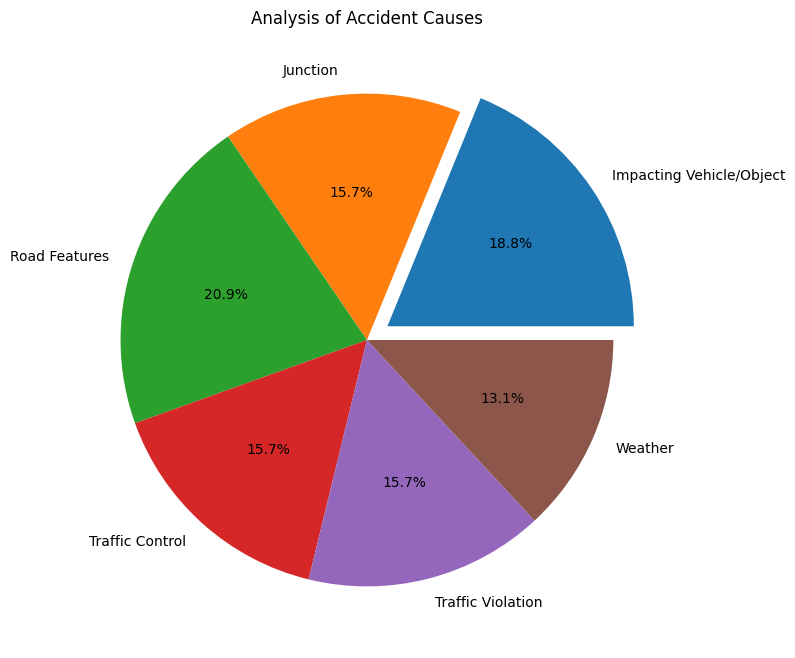

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Analysis of Accident Causes')
plt.pie(accident_cause['Count'],explode=[0.1,0,0,0,0,0],labels=accident_cause['Cause category'],autopct="%1.1f%%")
plt.show()

In [ ]:
# Impact of weather has lesser impact that other causes.
# Noticable Number of incident incase of Road features.

 C. Outcomes of Incidents vs Count.

In [ ]:
df.head(2)

,city,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0


In [ ]:
accident_incident=df.groupby('Outcome of Incident')['Count'].sum().reset_index()
accident_incident

,Outcome of Incident,Count
0,Greviously Injured,123192.0
1,Minor Injury,179898.0
2,Persons Killed,81252.0
3,Total Injured,252575.0
4,Total number of Accidents,352416.0


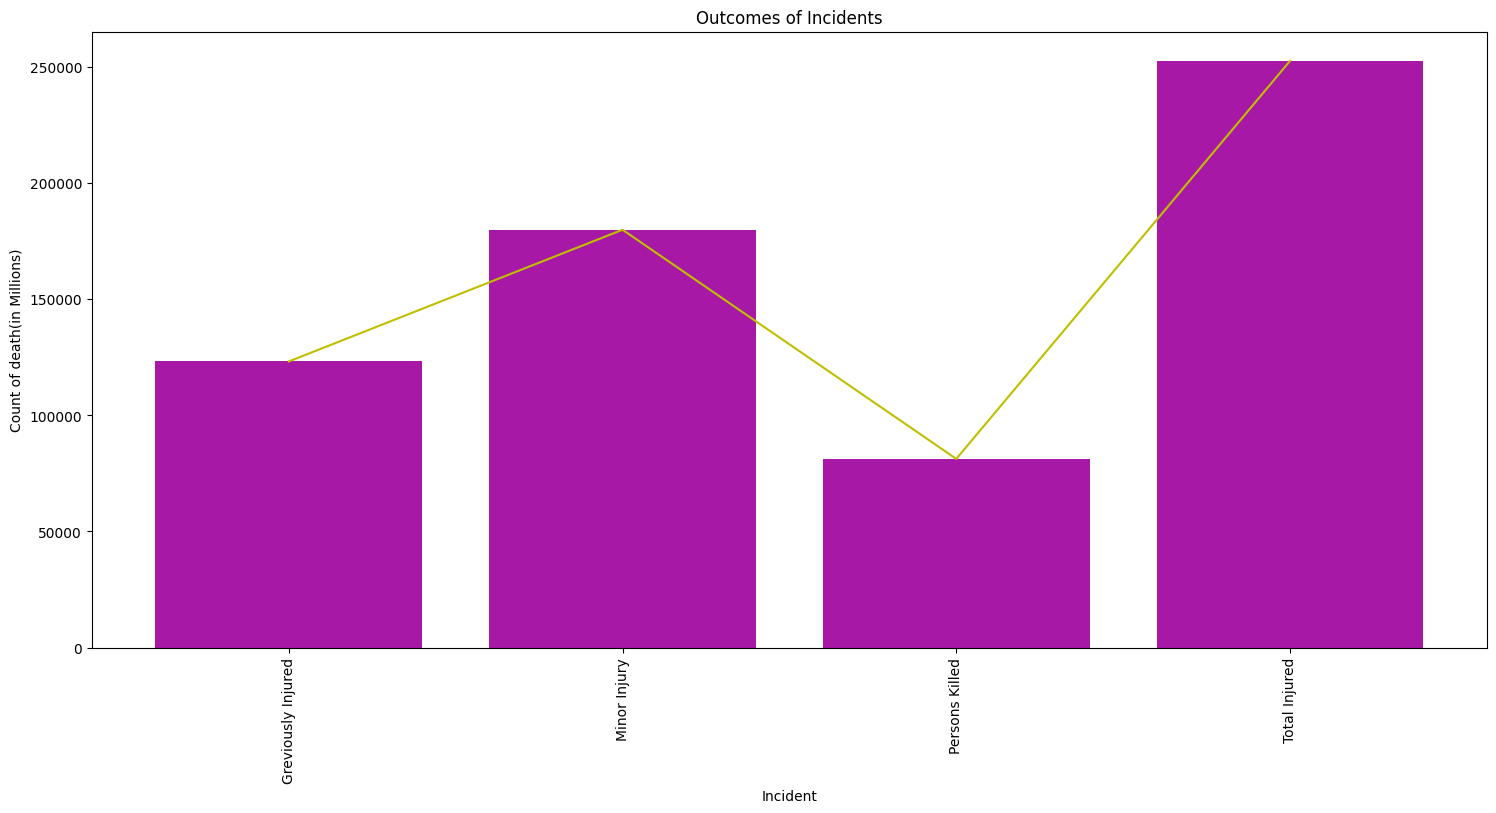

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Outcomes of Incidents')
sns.barplot(data=accident_incident[:4],x='Outcome of Incident',y='Count',color='m')
sns.lineplot(data=accident_incident[:4],x='Outcome of Incident',y='Count',color='y',markers="o",)
plt.xlabel('Incident')
plt.xticks(rotation=90)
plt.ylabel('Count of death(in Millions)')
plt.show()

In [ ]:
# Number of Minor injury is more than a person killed,
# so by analysing the cause and taking quick action the problem can be resolved soon.

The relationship between causes and outcomes of road accidents.

In [ ]:
df.head(2)

,city,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0


In [ ]:
cause_outcomes= df.groupby(['Cause category','Outcome of Incident'])['Count'].sum().reset_index()

In [ ]:
cause_outcomes.sort_values(by='Count',ascending=False)

,Cause category,Outcome of Incident,Count
3,Impacting Vehicle/Object,Total number of Accidents,58736.0
8,Junction,Total number of Accidents,58736.0
28,Weather,Total number of Accidents,58736.0
18,Traffic Control,Total number of Accidents,58736.0
13,Road Features,Total number of Accidents,58736.0
23,Traffic Violation,Total number of Accidents,58736.0
17,Traffic Control,Total Injured,50515.0
27,Weather,Total Injured,50515.0
22,Traffic Violation,Total Injured,50515.0
12,Road Features,Total Injured,50515.0


 # Conclusion
 Summarizekeyfindingsfromtheanalysis:

 ● Identify the cities with the highest number of accidents.

    --> Chennai, Delhi, Jabalpur, bangaluru, Indore.

 ● Highlight the most common causes of accidents.

    --> Impacting vehical, Road feature, Traffic control.

 ● Discuss the relationship between causes and outcomes of road accidents.

    --> Impacting Vehicle/Object,	Total number of Accidents	=58736
  
        Junction,	Total number of Accidents=	58736.0

        Weather	,Total number of Accidents=	58736.0

        Traffic Control,	Total number of Accidents=	58736.0

        Road Features	, Total number of Accidents=	58736.0

        Traffic Violation	, Total number of Accidents=	58736.0

        Traffic Control,	Total Injured=	50515.0

        Weather,	Total Injured=	50515.0

        Traffic Violation,	Total Injured=	50515.0

        Road Features,	Total Injured=	50515.0

        Junction,	Total Injured=	50515.0

        Road Features,	Minor Injury=	29983.0

        Impacting Vehicle/Object,	Minor Injury=	29983.0

        Weather,	Minor Injury=	29983.0

        Traffic Violation,	Minor Injury=	29983.0

        Junction,	Minor Injury=	29983.0

        Traffic Control,	Minor Injury=	29983.0

        Junction,	Greviously Injured=	20532.0

        Impacting Vehicle/Object,	Greviously Injured=	20532.0

        Traffic Control,	Greviously Injured=	20532.0

        Road Features,	Greviously Injured=	20532.0

        Weather,	Greviously Injured=	20532.0

        Traffic Violation,	Greviously Injured=	20532.0

        Impacting Vehicle/Object,	Persons Killed=	13542.0

        Junction,	Persons Killed=	13542.0

        Road Features,	Persons Killed=	13542.0

        Traffic Control,	Persons Killed=	13542.0

        Traffic Violation,	Persons Killed=	13542.0

        Weather,	Persons Killed=	13542.0



🧩 Key Insights

    1.Top 5 cities with highest accidents: Chennai, Delhi, Jabalpur, Bengaluru, Indore.

    2.Major contributing causes: Impacting Vehicle/Object, Road Features, and Traffic Control.

    3.Severity correlation:

    Minor injuries: 29,983 cases (mostly due to road features & weather).

    Grievous injuries: 20,532 cases (linked with vehicle impact and violations).

    Fatalities: 13,542 deaths (commonly associated with traffic violations and poor control).